In [1]:
import sys
sys.path.append('/home/sophie/Workspace')

In [2]:
import numpy as np
from BrainEmbeddingPhase2.B2BNet.leave_one_utility \
    import LeaveOne
experiment_path = 'Samsung_T5/Experiment2019/K-fold_NYU/'

In [3]:
leave_none_test = LeaveOne(experiment_path)
prob_a1a3_in_a1a3, prob_a1a3_in_typical,\
prob_typical_in_a1a3, prob_typical_in_typical = leave_none_test.leave_none_test()

100%|██████████| 216/216 [00:00<00:00, 906.93it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3


(24, 188) (2, 192)


/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/latent_group_utility.py:52: RuntimeWarning: divide by zero encountered in log
  np.log(norm_distribution.pdf(diver_x_set_cent_b2[subject_index, centroid_index]))


In [4]:
to_typical_max, to_a1a3_max =  leave_none_test.get_max_prob(
    prob_a1a3_in_a1a3, prob_a1a3_in_typical, prob_typical_in_a1a3, prob_typical_in_typical)

In [5]:
import pandas as pd

In [10]:
data = {'prob_a1a3_in_a1a3': prob_a1a3_in_a1a3,
        'prob_a1a3_in_typical': prob_a1a3_in_typical,
        'prob_typical_in_a1a3': prob_typical_in_a1a3,
        'prob_typical_in_typical' :prob_typical_in_typical
       }

In [6]:
np.shape(prob_a1a3_in_a1a3)

(88, 5)

In [7]:
prob_a1a3_in_universal = np.concatenate((prob_a1a3_in_a1a3, prob_a1a3_in_typical), axis=1)

In [8]:
np.shape(prob_a1a3_in_universal)

(88, 10)

In [9]:
prob_typical_in_universal = np.concatenate((prob_typical_in_a1a3, prob_typical_in_typical), axis=1)

In [10]:
np.shape(prob_typical_in_universal)

(84, 10)

In [11]:
df_prob_a1a3_in_universal = pd.DataFrame(prob_a1a3_in_universal)
df_prob_typical_in_universal = pd.DataFrame(prob_typical_in_universal)

In [12]:
prefix = '/media/sophie/'
with pd.ExcelWriter(prefix+experiment_path+"leave_none_prob.xlsx") as writer:  # doctest: +SKIP
    df_prob_a1a3_in_universal.to_excel(writer, sheet_name='prob_a1a3_in_universal') 
    df_prob_typical_in_universal.to_excel(writer, sheet_name='prob_typical_in_universal') 

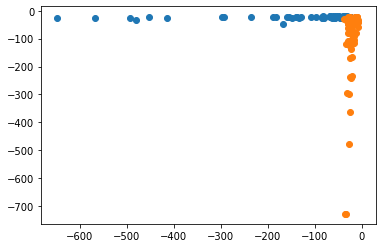

In [6]:
import matplotlib.pyplot as plt
plt.scatter(to_typical_max[:84], to_a1a3_max[:84] )
plt.scatter(to_typical_max[84:], to_a1a3_max[84:] )
plt.show()

In [5]:
leave_none_test.leave_one_regression_sort(to_typical_sort, to_a1a3_sort)

100%|██████████| 172/172 [00:01<00:00, 150.16it/s]


{'mean_score': 0.953794369645043,
 'accurate_count': 162,
 'f1_score': 0.9411764705882352}

In [6]:
leave_none_test.leave_one_regression_max(to_typical_max, to_a1a3_max)

100%|██████████| 172/172 [00:00<00:00, 278.61it/s]


{'mean_score': 0.9365225078199374,
 'accurate_count': 161,
 'f1_score': 0.935672514619883}

In [7]:
leave_one_test = LeaveOne(experiment_path)
to_typical_max, to_a1a3_max, to_typical_sort, to_a1a3_sort = leave_one_test.leave_one_test()

100%|██████████| 216/216 [00:00<00:00, 896.23it/s]
/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/load_group_data.py:109: RuntimeWarning: invalid value encountered in true_divide
  individuals_relative[ta1a3_group[i]] = individuals_norm[ta1a3_group[i]] / norm_ta1a3
  0%|          | 0/172 [00:00<?, ?it/s]

(24, 188) (2, 192)


/home/sophie/Workspace/BrainEmbeddingPhase2/B2BNet/latent_group_utility.py:52: RuntimeWarning: divide by zero encountered in log
  np.log(norm_distribution.pdf(diver_x_set_cent_b2[subject_index, centroid_index]))
100%|██████████| 172/172 [04:34<00:00,  1.63s/it]


In [8]:
leave_one_test.leave_one_regression_sort(to_typical_sort, to_a1a3_sort, train_type="leave one")

100%|██████████| 172/172 [00:00<00:00, 172.33it/s]


{'mean_score': 0.5936352509179927,
 'accurate_count': 95,
 'f1_score': 0.4210526315789474}

In [9]:
leave_one_test.leave_one_regression_max(to_typical_max, to_a1a3_max, train_type="leave one")

100%|██████████| 172/172 [00:00<00:00, 301.52it/s]


{'mean_score': 0.526689786481708,
 'accurate_count': 86,
 'f1_score': 0.17307692307692304}

<Figure size 640x480 with 0 Axes>

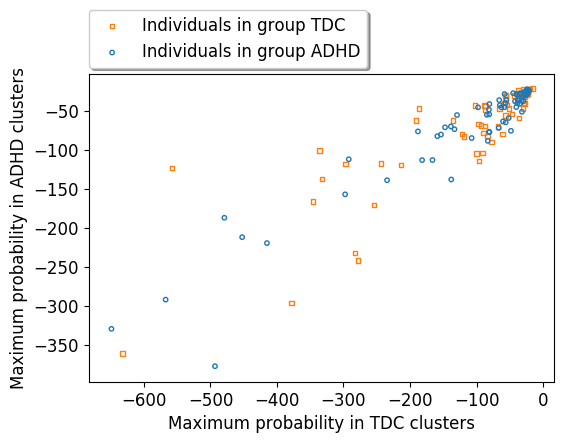

In [10]:
import matplotlib.pyplot as plt  
plt.clf()
plt.figure(figsize=(6, 4))
plt.scatter(to_typical_max[88:], 
            to_a1a3_max[88:], 
            label='Individuals in group TDC', s=10,
            facecolors='none',
            edgecolors='tab:orange',
            marker='s')
plt.scatter(to_typical_max[:88], 
            to_a1a3_max[:88], 
            label='Individuals in group ADHD', s=10,
            facecolors='none',
            edgecolors='tab:blue',
            marker='o')

plt.tick_params(labelsize=12)
plt.ylabel('Maximum probability in ADHD clusters', fontsize=12)
plt.xlabel('Maximum probability in TDC clusters', fontsize=12)

plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
           borderaxespad=0,
           shadow=True, fancybox=True, fontsize=12)
plt.show()

In [15]:
np.shape(to_typical_max)

(172, 1)

In [20]:
prefix = '/media/sophie/'
np.save(prefix+experiment_path+'leave_one_to_typical_max',to_typical_max) 
np.save(prefix+experiment_path+'leave_one_to_a1a3_max',to_a1a3_max) 
np.save(prefix+experiment_path+'leave_one_to_typical_sort',to_typical_sort)
np.save(prefix+experiment_path+'leave_one_to_a1a3_sort',to_a1a3_sort)

In [6]:
prefix = '/media/sophie/'
leave_one_to_typical_max = np.load(prefix+experiment_path+'leave_one_to_typical_max.npy')

In [7]:
leave_one_to_a1a3_max = np.load(prefix+experiment_path+'leave_one_to_a1a3_max.npy')

In [8]:
leave_one_to_typical_max

array([[ -28.20822071],
       [ -55.854597  ],
       [ -81.10648609],
       [-220.18889816],
       [         -inf],
       [ -27.6520617 ],
       [ -27.12616379],
       [ -38.61535421],
       [ -89.30672894],
       [ -65.5814963 ],
       [-450.43222708],
       [ -28.35068371],
       [ -71.94832301],
       [         -inf],
       [ -36.75328582],
       [         -inf],
       [ -41.84840033],
       [         -inf],
       [ -29.09217237],
       [-157.763815  ],
       [-191.20624716],
       [ -77.73377649],
       [ -29.71856   ],
       [-112.77702982],
       [ -37.05120721],
       [ -27.51823059],
       [ -59.95362978],
       [ -41.18394865],
       [ -29.28764883],
       [ -31.43914785],
       [ -46.02223434],
       [ -73.73031014],
       [ -28.7561903 ],
       [-138.84512028],
       [ -25.96485062],
       [-378.06138483],
       [ -43.45964882],
       [ -38.57306769],
       [ -28.82310713],
       [ -52.06675861],
       [-113.35858263],
       [ -40.724